# Progress Check 2

**MODEL BUILDING & EVALUATION**

**Install required packages**

In [14]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/376.0 MB 3.2 MB/s eta 0:01:58
   ---------------------------------------- 2.6/376.0 MB 4.4 MB/s eta 0:01:25
   ---------------------------------------- 2.6/376.0 MB 4.4 MB/s eta 0:01:25
   ---------------------------------------- 2.6/376.0 MB 4.4 MB/s eta 0:01:25
   -----------------------------------

**Data Preparation for modelling**

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Continue from the previously prepared data (df_1)
df_1 = pd.read_csv("df_1_cleaned_assignment_data.csv")

# Prepare features for modeling
df_1['listed_date'] = pd.to_datetime(df_1['listed_date'])
df_1['listed_month'] = df_1['listed_date'].dt.month
df_1['listed_year'] = df_1['listed_date'].dt.year
df_1['listed_day'] = df_1['listed_date'].dt.day

# Create binary target variable
df_1['target'] = df_1['price_outcome'].apply(lambda x: 1 if x == 'Higher' else 0)

# Select features
numeric_features = ['listed_price', 'days_on_market', 'number_of_beds', 
                   'number_of_baths', 'number_of_parks', 'property_size',
                   'listed_month', 'listed_year', 'listed_day']

# Get dummy columns
dummy_columns = [col for col in df_1.columns if col.startswith('property_classification_') 
                or col.startswith('property_sub_classification_')]

# Create feature sets
X_features = df_1[numeric_features + dummy_columns]
y = df_1['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest Model**

In [26]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_features.columns,
    'Importance': rf_model.feature_importances_
})
top_features = feature_importance.sort_values('Importance', ascending=False).head(5)
print("Top 5 Important Features:")
print(top_features)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       465
           1       0.86      0.94      0.90       786

    accuracy                           0.86      1251
   macro avg       0.87      0.84      0.85      1251
weighted avg       0.87      0.86      0.86      1251

Top 5 Important Features:
          Feature  Importance
0    listed_price    0.217045
1  days_on_market    0.212579
8      listed_day    0.147166
5   property_size    0.141298
6    listed_month    0.110704


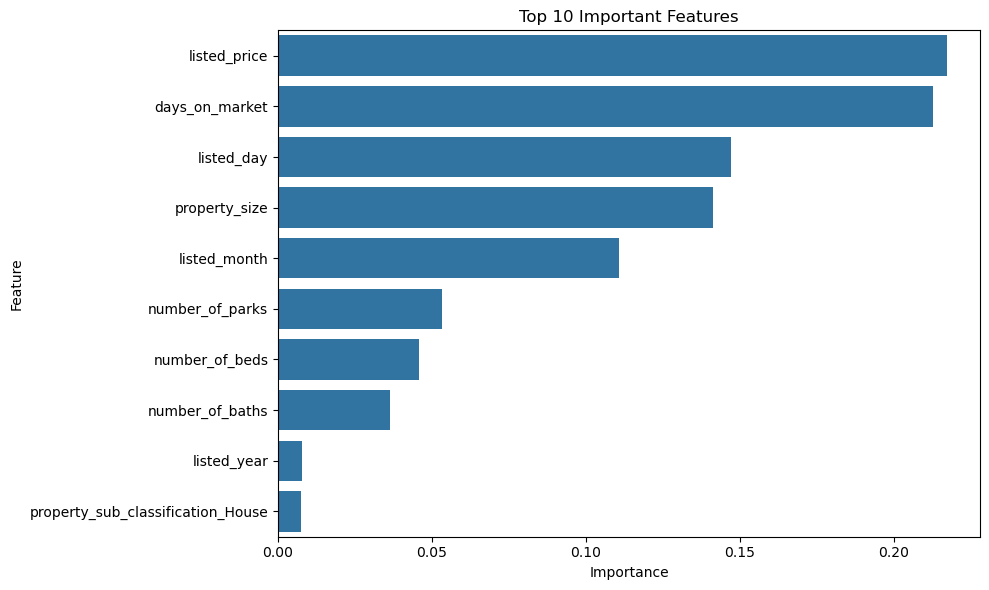

In [27]:
# Visualize feature importance
feature_importance = pd.DataFrame({
    'Feature': X_features.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

**Logistic Regression Model**

In [28]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Evaluate Logistic Regression
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.29      0.39       465
           1       0.68      0.90      0.78       786

    accuracy                           0.67      1251
   macro avg       0.66      0.59      0.59      1251
weighted avg       0.66      0.67      0.63      1251



**Feedforward Neural Network Model**

In [29]:
# Create a simple feedforward neural network
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Build the model using functional API to avoid the warning
input_layer = Input(shape=(X_train_scaled.shape[1],))
hidden1 = Dense(64, activation='relu')(input_layer)
dropout1 = Dropout(0.2)(hidden1)
hidden2 = Dense(32, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(hidden2)
output_layer = Dense(1, activation='sigmoid')(dropout2)

ann_model = Model(inputs=input_layer, outputs=output_layer)
ann_model.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Train ANN model
ann_model.fit(X_train_scaled, y_train, 
            epochs=10, 
            batch_size=32, 
            verbose=1,
            validation_split=0.1)


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6120 - loss: 0.6838 - val_accuracy: 0.6480 - val_loss: 0.6260
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6479 - loss: 0.6357 - val_accuracy: 0.6880 - val_loss: 0.6154
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6499 - loss: 0.6339 - val_accuracy: 0.6780 - val_loss: 0.6079
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6677 - loss: 0.6069 - val_accuracy: 0.6720 - val_loss: 0.6100
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6492 - loss: 0.6173 - val_accuracy: 0.6820 - val_loss: 0.6037
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6623 - loss: 0.6074 - val_accuracy: 0.6820 - val_loss: 0.6011
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6720 - loss: 0.5961 - val_accuracy: 0.6800 - val_loss: 0.5986
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6747 - loss: 0.5934 - val_accuracy: 0

In [30]:
# Evaluate ANN Model
# Evaluate ANN
y_pred_proba_ann = ann_model.predict(X_test_scaled)
y_pred_ann = (y_pred_proba_ann > 0.5).astype(int)
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_ann))

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.38      0.47       465
           1       0.70      0.85      0.77       786

    accuracy                           0.67      1251
   macro avg       0.65      0.62      0.62      1251
weighted avg       0.66      0.67      0.65      1251



**Compare Models and Select Best**

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


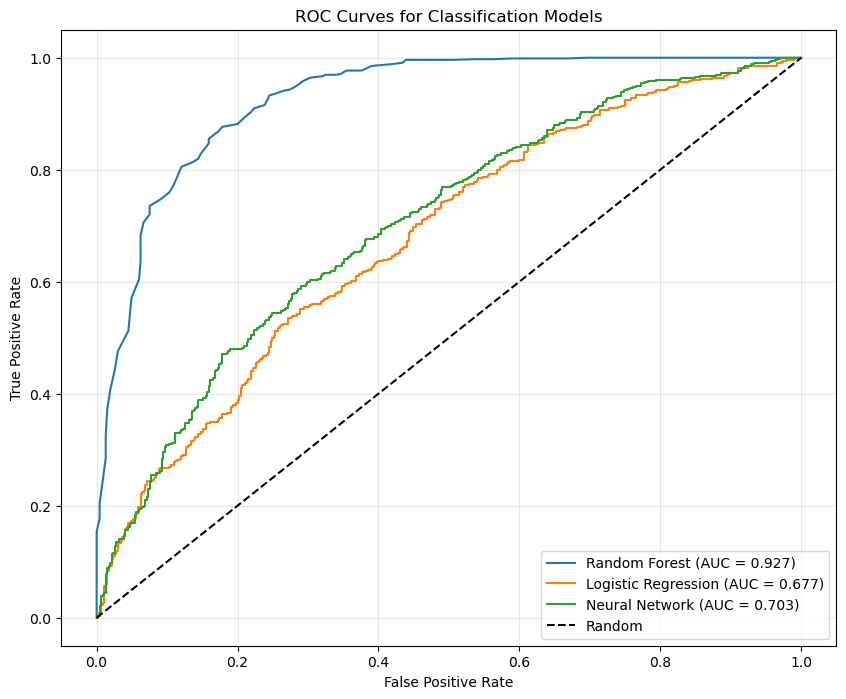

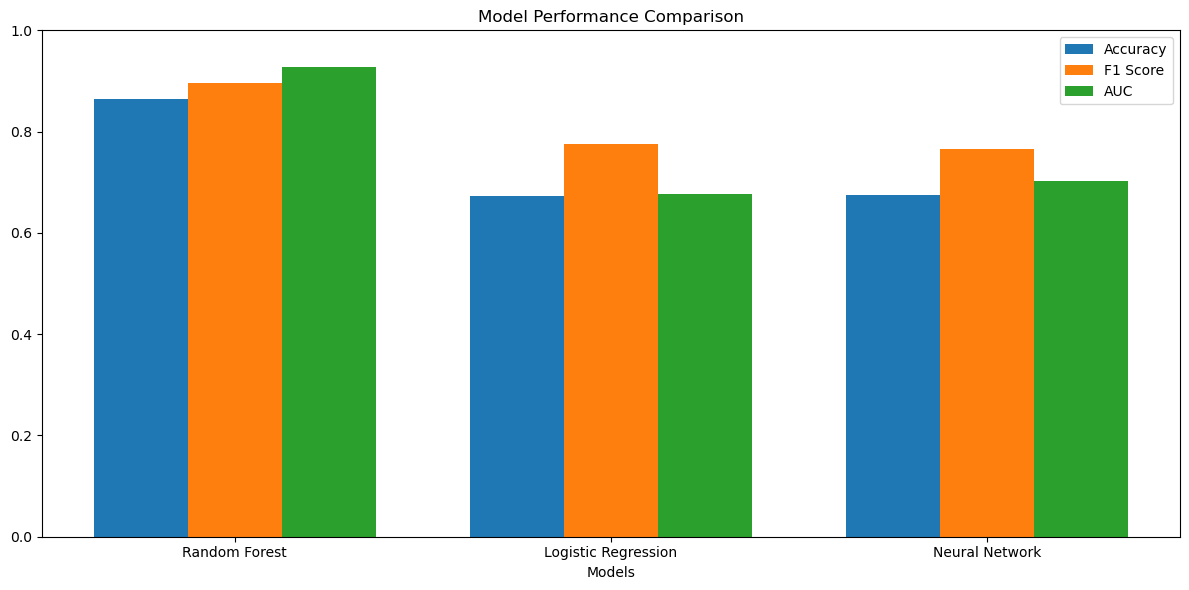

The best performing model is: Random Forest
Best model metrics:
- Accuracy: 0.8641
- F1 Score: 0.8970
- AUC: 0.9273


In [31]:
# Compare model performances
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score

# Compare model performances
models = ['Random Forest', 'Logistic Regression', 'Neural Network']
accuracy_scores = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_ann.flatten())
]
f1_scores = [
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_ann.flatten())
]

# Get probabilities for ROC curves
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
y_prob_ann = ann_model.predict(X_test_scaled).flatten()

# Calculate ROC curve and AUC for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_prob_ann)

auc_rf = auc(fpr_rf, tpr_rf)
auc_lr = auc(fpr_lr, tpr_lr)
auc_ann = auc(fpr_ann, tpr_ann)

auc_scores = [auc_rf, auc_lr, auc_ann]

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_ann, tpr_ann, label=f'Neural Network (AUC = {auc_ann:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Visualize performance metrics comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(models))
width = 0.25

plt.bar(x - width, accuracy_scores, width, label='Accuracy')
plt.bar(x, f1_scores, width, label='F1 Score')
plt.bar(x + width, auc_scores, width, label='AUC')

plt.xlabel('Models')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

# Find best model based on AUC and F1 score (balanced assessment)
best_model_index = np.argmax([(f1 + auc)/2 for f1, auc in zip(f1_scores, auc_scores)])
best_model_name = models[best_model_index]
print(f"The best performing model is: {best_model_name}")
print(f"Best model metrics:")
print(f"- Accuracy: {accuracy_scores[best_model_index]:.4f}")
print(f"- F1 Score: {f1_scores[best_model_index]:.4f}")
print(f"- AUC: {auc_scores[best_model_index]:.4f}")